https://velog.io/@woojinn8/LightWeight-Deep-Learning-6.-MobileNet-2-MobileNet%EC%9D%98-%EA%B5%AC%EC%A1%B0-%EB%B0%8F-%EC%84%B1%EB%8A%A5

https://m.blog.naver.com/chacagea/221582912200

https://coding-yoon.tistory.com/122

https://housekdk.gitbook.io/ml/ml/deployment/mobilenet

# 1. Depthwise Convolution  (wise : 방향으로)
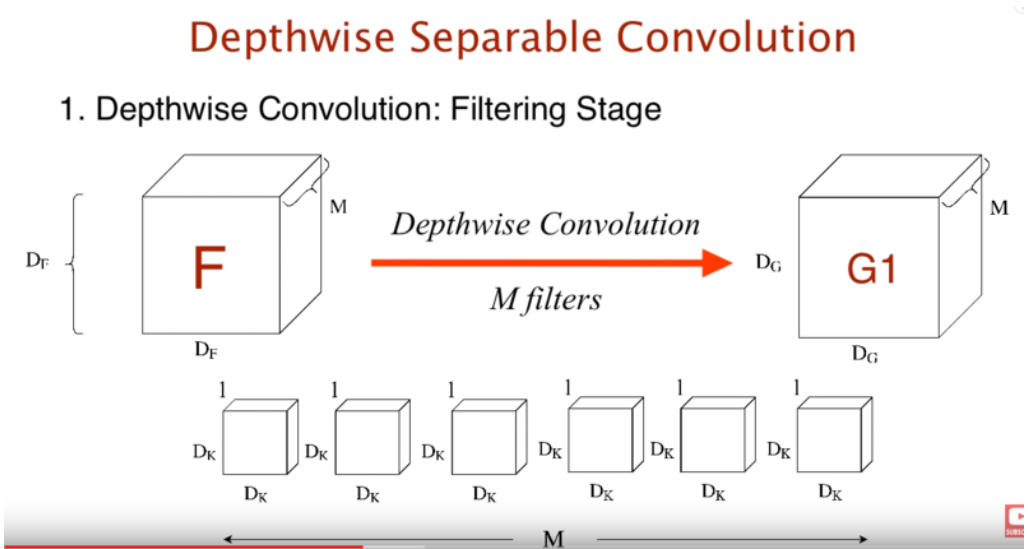

Depthwise Convolution의 경우 각 input 채널별로 컨볼루션 계산된 값을 합치지 않고 그대로 놔둔다 
즉, input chanel = output chanel이 된다.

변화는 image size(W, H)에서만 생긴다.

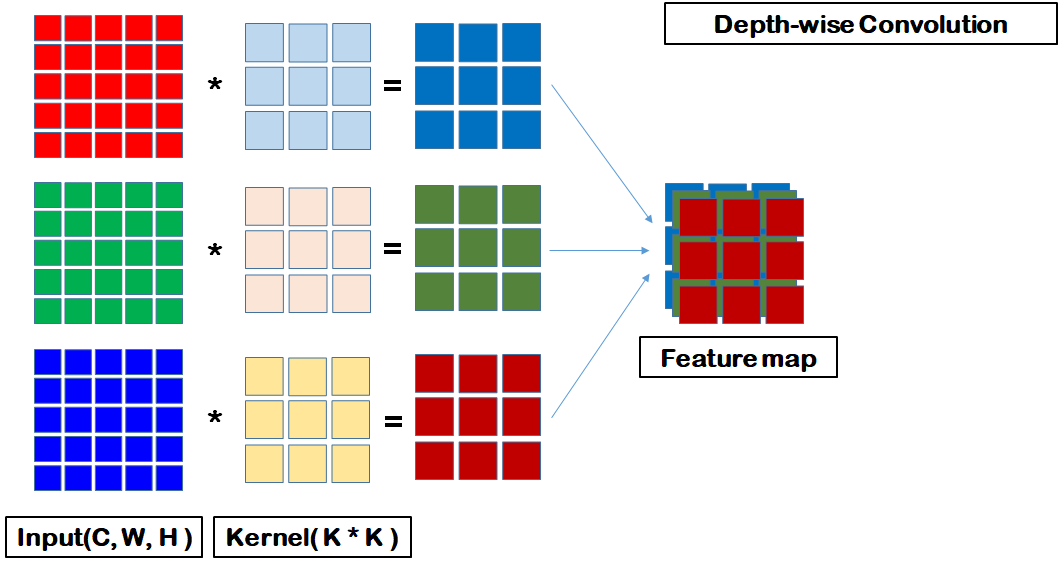

# 2. Pointwise Convolution

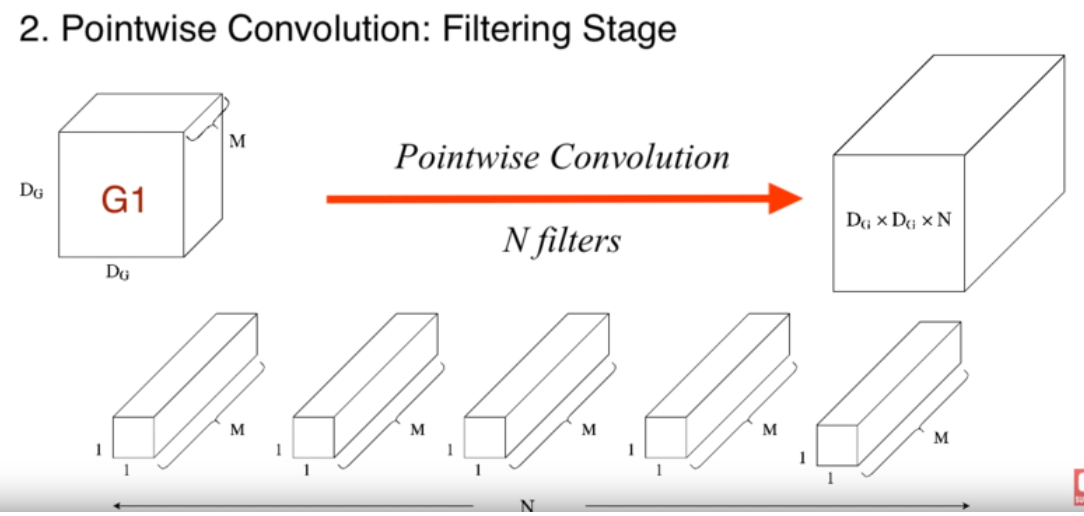
Separable Convolution이라고도 불리며, 1x1 convolution을 의미한다(다른 작성 자료 참고)
연산량이 가장 적게 필요로 하기 때문에, Feature Map 개수를 조절할 때 사용된다.
즉, 연산결과 이미지 사이즈는 그대로이되 Channel의 개수가 변경된다.

# 3. Depthwise Separable Convolution 
위 두 컨볼루션을 합친 것으로 기존의 컨볼루션 연산을 Depthwise와 Pointwise 컨볼루션으로 나누어 수행한다.
아래 그림처럼 FeatureMap의 크기가 더 작아진다.

이렇게 되면 연산량에서 이득을 볼수 있다. (정보량은 소실될수 있어 정확도가 떨어질수도 있지만, 오히려 정확도가 소폭 증가한다는 논문 존재)

-일반 컨벌루션의 Feature Map을 생성하기 위한 연산 횟수 = C * K * K * M  (M은 Feature Map의 개수)

-Depthwise Separable Feature Map을 생성하기 위한 연산 횟수 = ( C * K * K ) + ( C * M )

K * K보다 M이 더 크다고 할때, K * K 분의 1만큼 파라미터의 개수가 감소한다고 볼수 있다. (KKM / KK+M 이므로)

Depthwise Separable Convolution의 연산량 감소율은 출력되는 feature map의 채널 수와 커널 크기에 의해 결정된다고 볼수 있다.
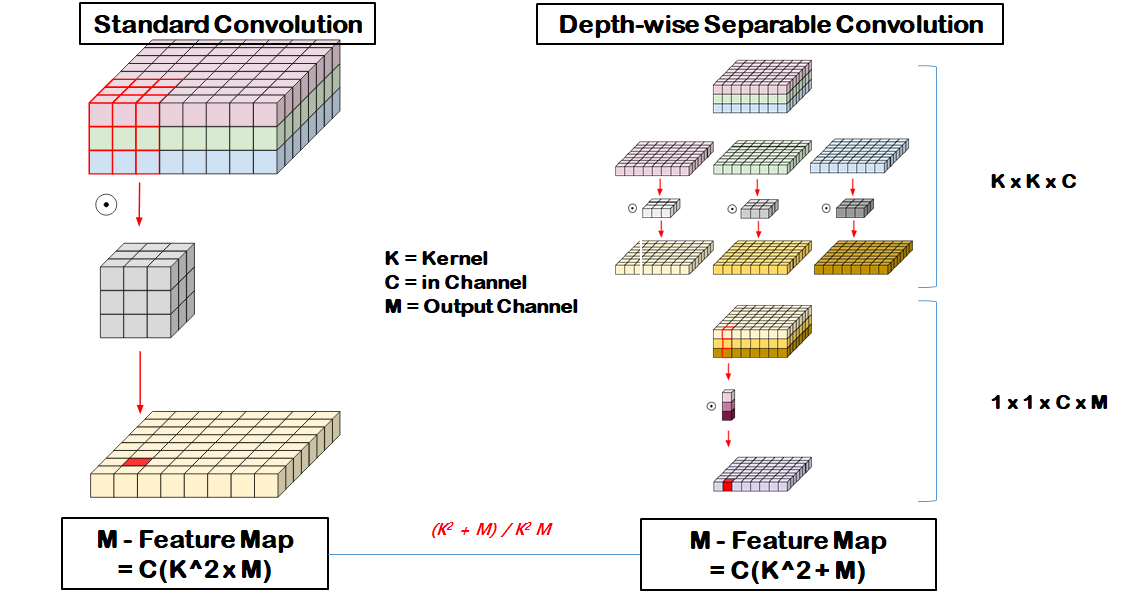

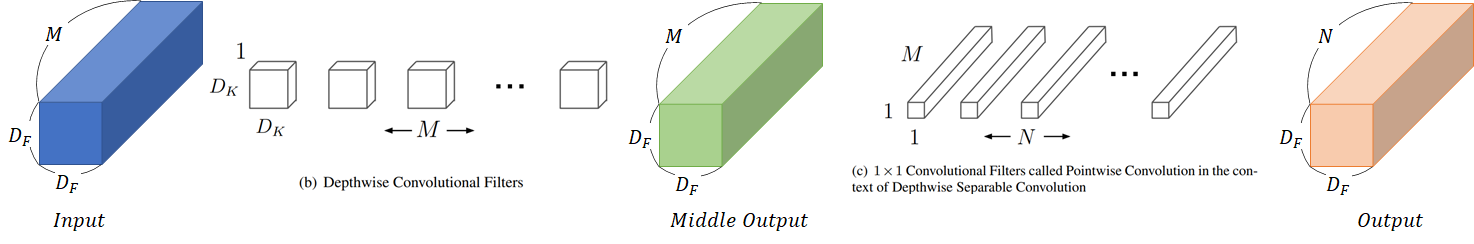

K * K보다 M이 더 크다고 할때, K * K 분의 1만큼 파라미터의 개수가 감소한다고 볼수 있다. (KKM / KK+M 이므로)
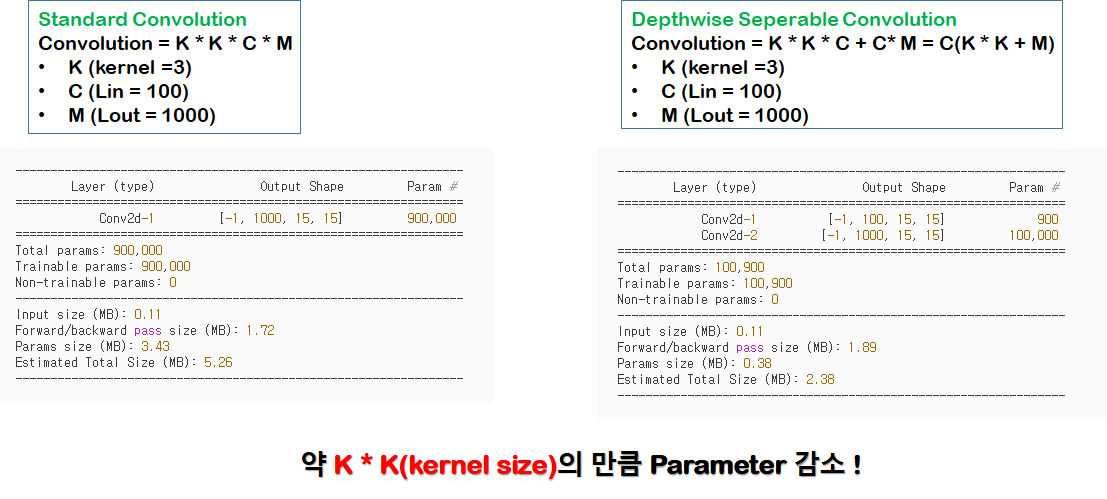

즉, 필터의 사이즈에 가장 큰 영향을 받게 되고 필터의 크기는 3을 사용하므로 약 
1
/
9
만큼 연산량이 줄어든것을 확인할 수 있다.

# 4. MobileNet 

Mobilenet은 효율적인 연산을 위해 Depthwise Separable Convolution을 적절히 활용한 경량화 네트워크다.

Xception과 MobileNet은 모두 Depthwise Separable Convolution을 활용한 효율적인 네트워크라는 공통점이 있다. 

하지만 Xception은 높은 정확도를 위해 depthwise separable convolution을 활용했고, 
MobileNet은 모바일 기기에서 돌아갈 수 있을만큼 경량한 구조를 설계하는데 집중했다는 차이점이 있다.
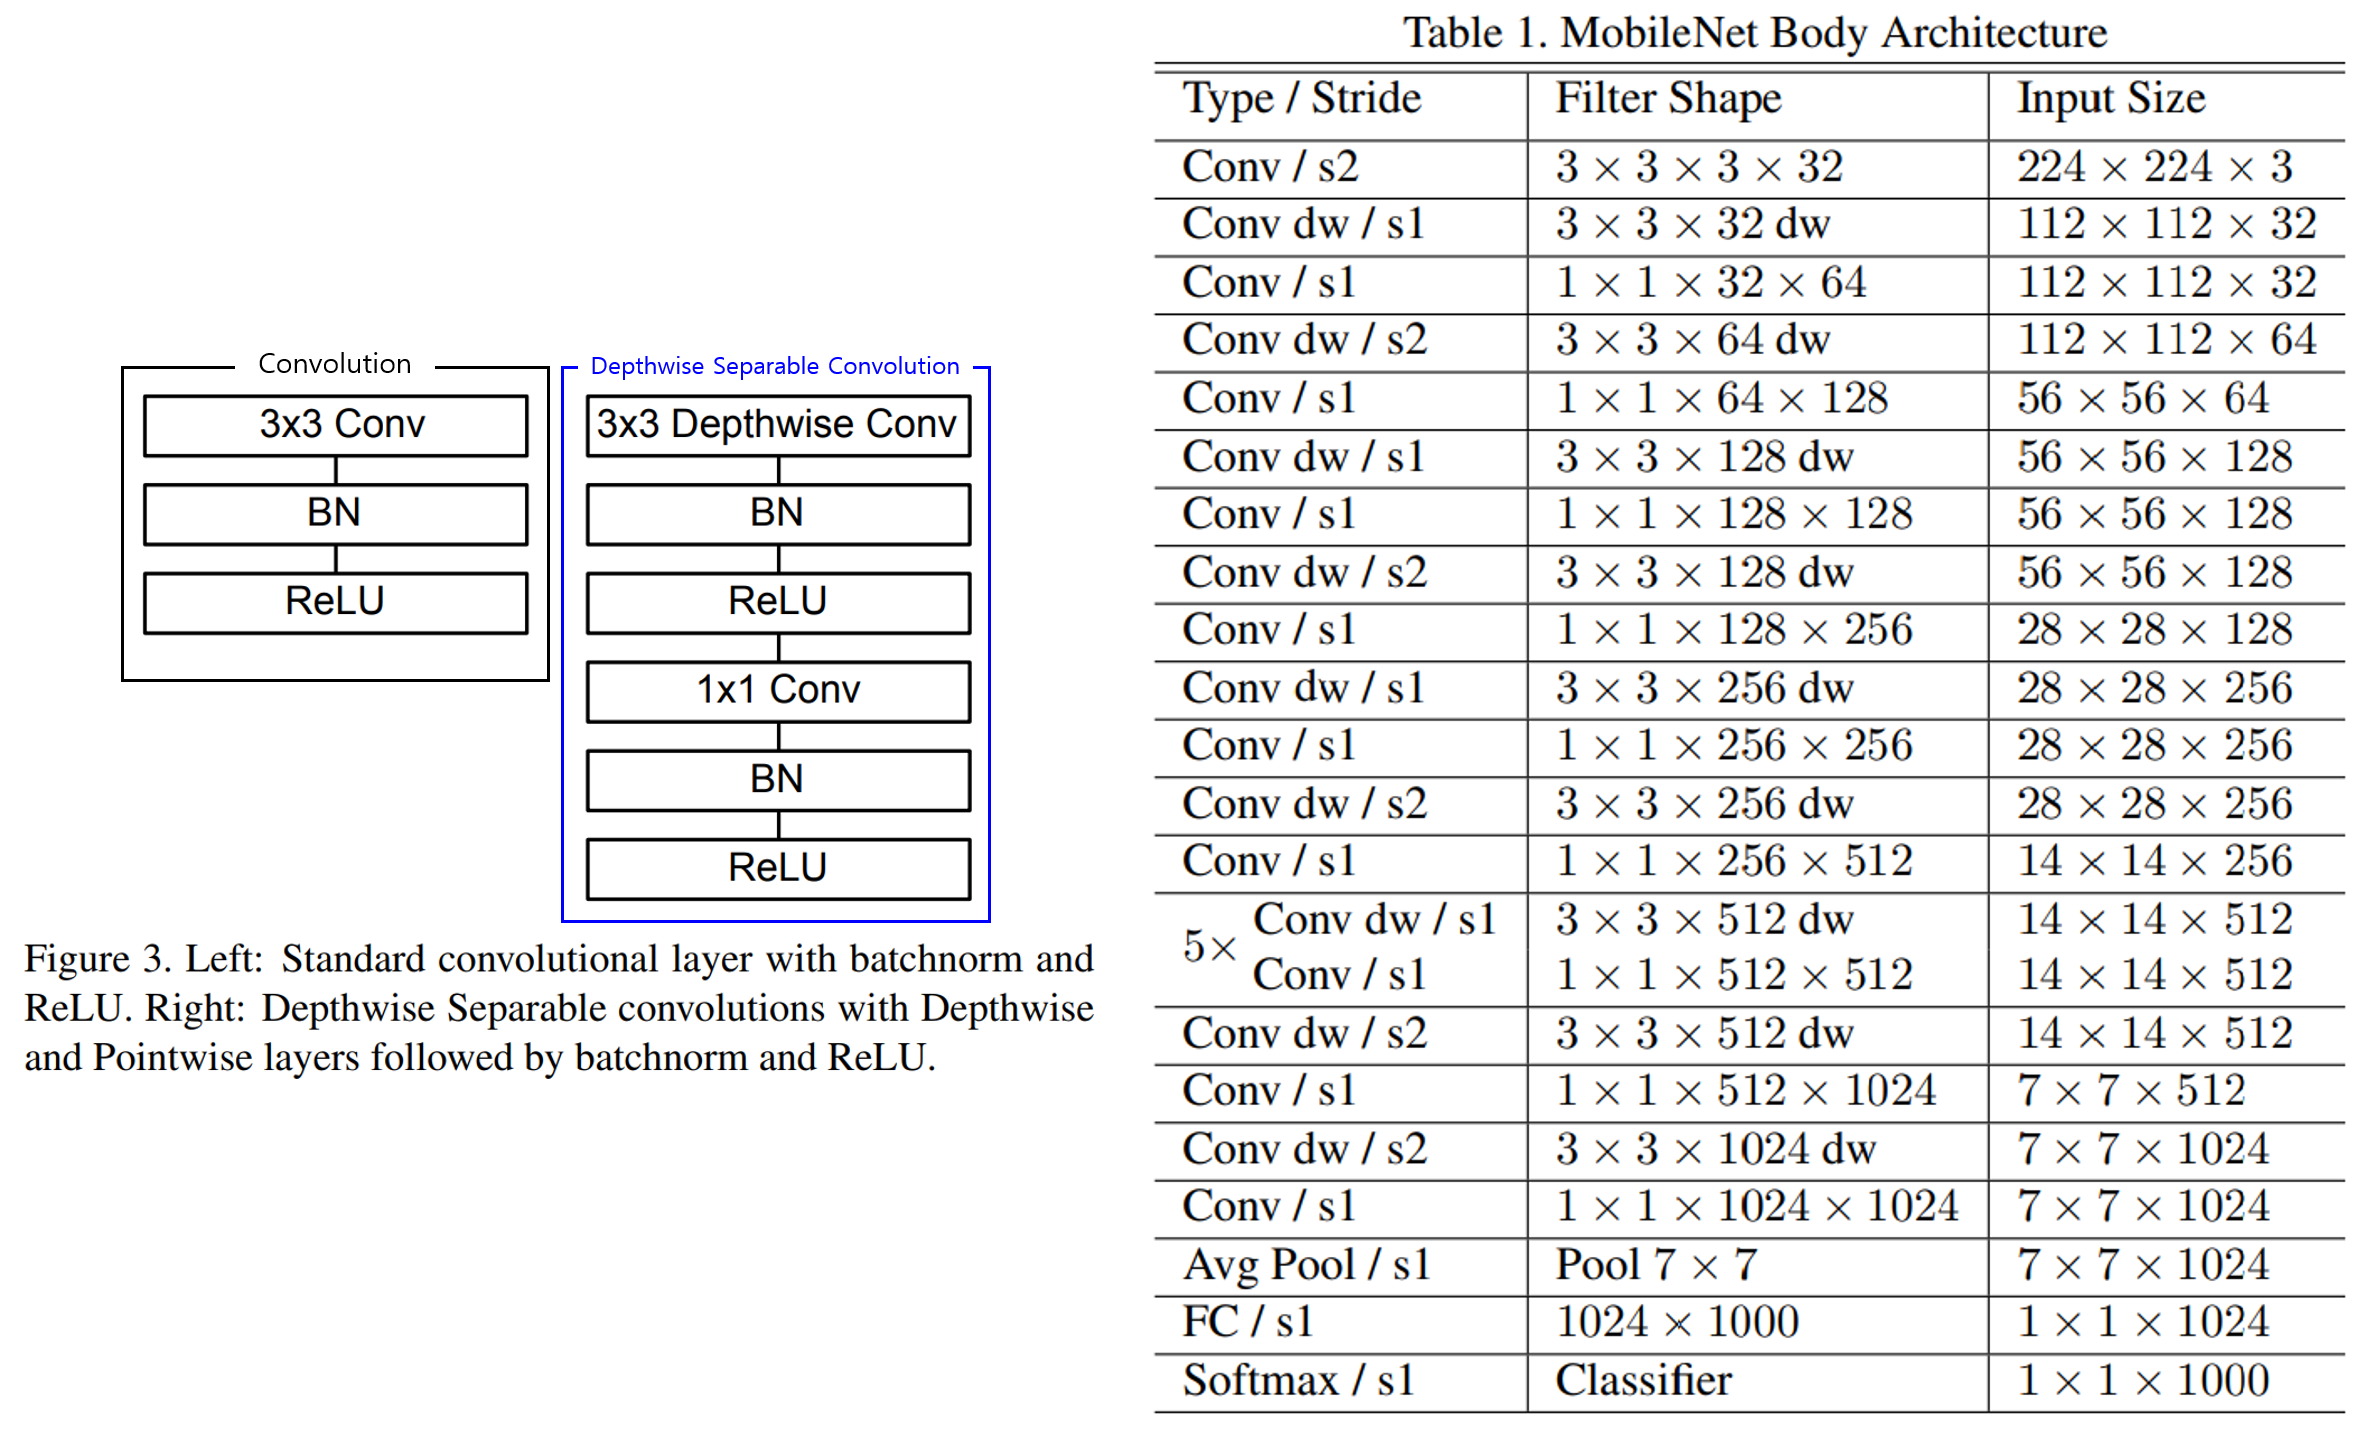

위 그림의 왼쪽은 MobileNet을 구성할 때 사용한 Convolution의 구조다. 

왼쪽의 검은 박스 안에는 다른 네트워크에서도 많이 사용된 Conv-BN-ReLU 순서의 블록으로 오른쪽 표에서 Conv로 나타낸 layer를 의미한다다. 

파란색 박스 안에 있는 Depthwise Separable Convolution은 오른쪽 표의 Conv dw로 나타낸 layer다.

MobileNet에서는 convolution에 stride를 줘서 해상도를 줄여나간다. 오른쪽 표에서 s로 표시한게 stride 값을 나타낸다.

특이한점은 Xception에서 소개된 내용과는 다르게 depthwise와 pointwise convolution의 각각 뒤에 Batch normalization과 ReLU를 붙여주는 점이다.

이 차이점은 MobileNet 논문에서는 자세히 다루지 않고 그저 아래 그림의 형태로 사용했다고만 쓰여있다

MobileNet 네트워크를 구성할 때 연산 효율에 집중했다. 행렬 연산에 최적화된 GEMM과 같은 함수는 행렬값을 메모리에 복사하는 과정이 필요하다. 하지만 1x1 Convolution을 연산할 땐 메모리 복사과정이 필요하지 않다.

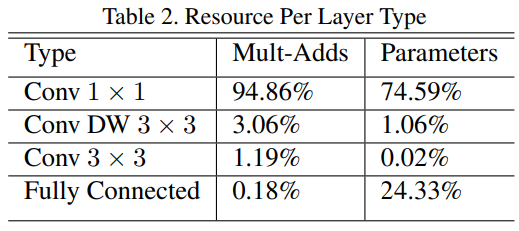

MobileNet의 구조에서는 1x1 Convolution은 전체 연산의 약 95%를 차지하며, 파라미터 비율은 전체에서 약 75%정도를 차지한다. 
따라서 MobileNet은 연산효율이 매우 높은 장점이 있다.

# 더 경량화된 모델을 만들기 위한 파라미터
MobileNet은 그 자체로도 이미 경량화 되어 있지만 상황에 따라 더 경량화된 네트워크가 필요할 수 있습니다. MobileNet에서는 이러한 경우 두 개의 hyper-parameter 활용해 네트워크 크기를 더욱 줄일 수 있게 만들었습니다.

MobileNet에서는 네트워크의 채널 수를 줄이는 Width Multiplier(α)와 해상도를 줄일 수 있는 Resolution Multiplier(ρ) 두 개의 Hyper-parameter를 활용합니다.

1) Width Multiplier : α
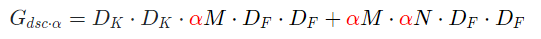
먼저 Width multiplier는 α라는 값을 활용해 모델의 채널 수를 줄입니다.

수식에서 살펴보면 입력 채널 수인 M과 출력 채널 수인 N의 값이 α만큼의 비율로 줄어듭니다. 따라서 연산 횟수와 파라미터 수를 α^2만큼 줄이는 역할을 합니다.

2) Resolution Multiplier : ρ
다음으로 Resolution Multiplier는 네트워크 입력의 해상도를 줄이는 hyper-parameter 입니다.
수식에서는 입력 해상도에 해당하는 D_F에 곱해져 연산횟수를 줄입니다.

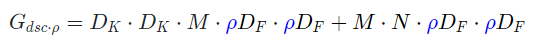

실험결과 α와 ρ 모두 값이 작아질수록 성능이 낮아지지만 연산량과 파라미터 수 또한 부드럽게 줄어드는것을 알 수 있다.

위 결과를 연산량과 파라미터 수에 따른 성능으로 다시 정리하면 다음과 같다.
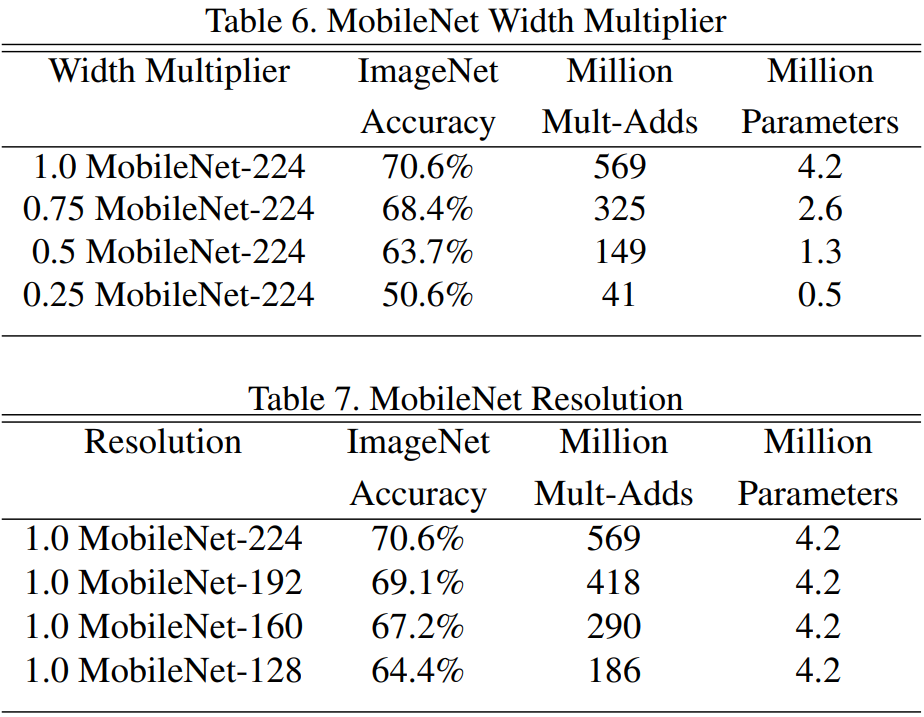

# MobileNet V2

V1보다 유사성능 또는 소폭 개선된 성능을 보이면서도 계산량은 줄어든 모델

핵심적인 내용은 Inverted Residuals와 Linear Bottlenecks 이다.

MobileNet V1의 구조
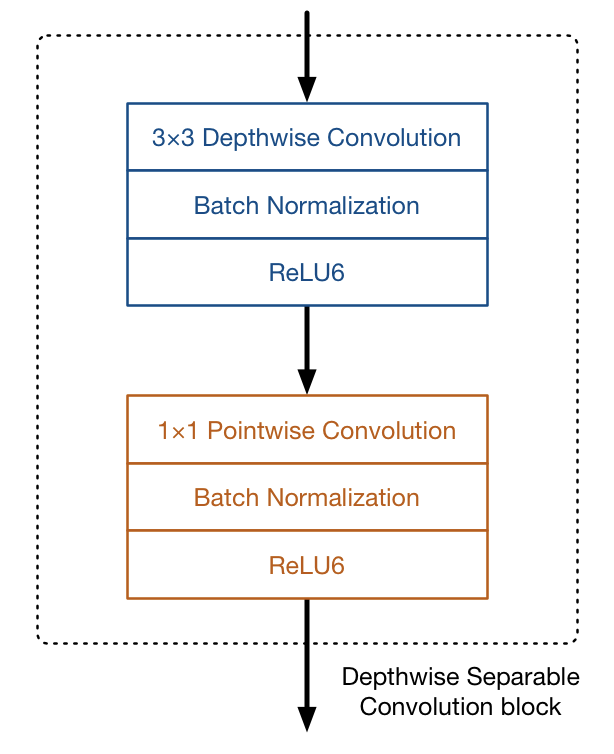

MobileNet V2의 구조
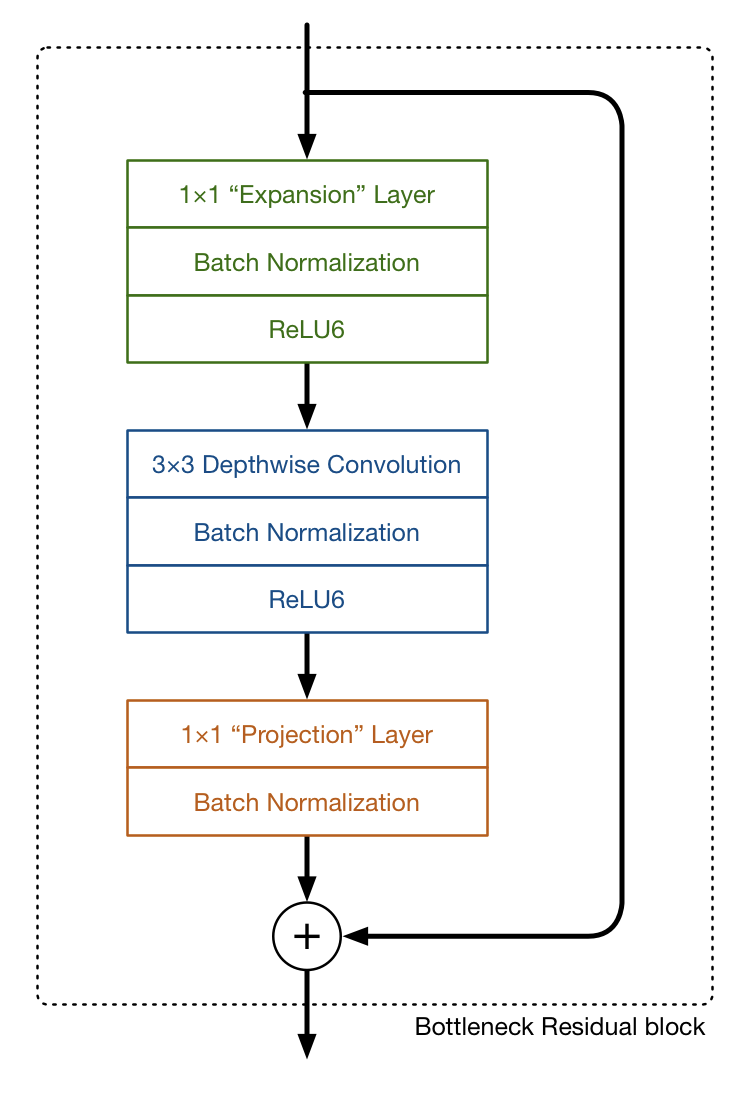

### 1. Inverted Residuals

보통 일반적인 Resdual block은 아래와 같다.

wide한 채널을 -> narrow -> wide의 변형을 거쳐 다시 wide한 형태로 원복한다. 
(첫번쨰 빨강이 narrow, 두번째는 정보추출, 세번째는 Wide이다)

network가 진행될수록 보통 channel수(filter 수)가 계속해서 증가하기 때문에  연산량을 절감하기위해 중간에서 1x1 conv로 채널을 한번 줄여준 뒤에 3x3 conv 연산을 하고 다시 원래의 채널로 돌려놓아 skip connection까지 하는 구조이다.
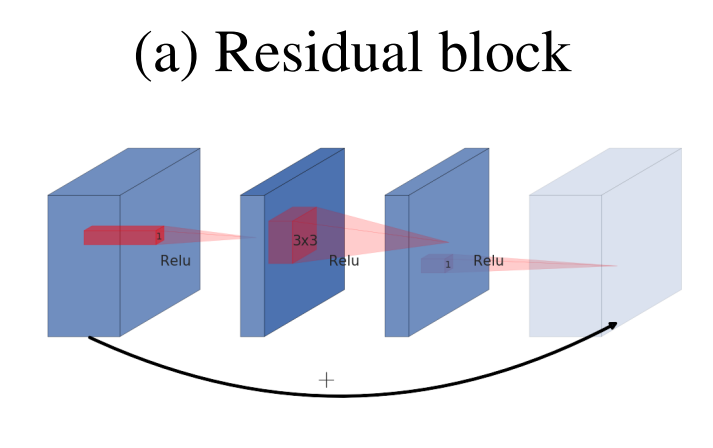

Mobilenet v2에서 제시하는 Inverted Residual 구조는 아래와 같다.

Inverted Residual block은 일반적인 Residual block과는 정 반대인 narrow한 채널수 -> wide -> narrow의 변형을 취한다 

이렇게 시도를 한 이유는 narrow에 해당하는 저차원의 layer에는 필요한 정보만 압축되어서 저장되어 있다라는 가정으로부터 나왔다. 

따라서 필요한 정보는 narrow에 있기 때문에, skip connection으로 사용해도 필요한 정보를 더 깊은 layer까지 전달할 것이라는 기대를 할 수 있다.

그림에서 양끝 레이어가 빗금이 쳐져있는데 이것은 linear bottleneck을 의미하며 즉 Relu를 사용하지 않는다는 것을 말한다. (그 이유는 아래 Linear Bottleneck에 나옴)

결과적인 주 목적은 연산량을 감소하기 위함이다.

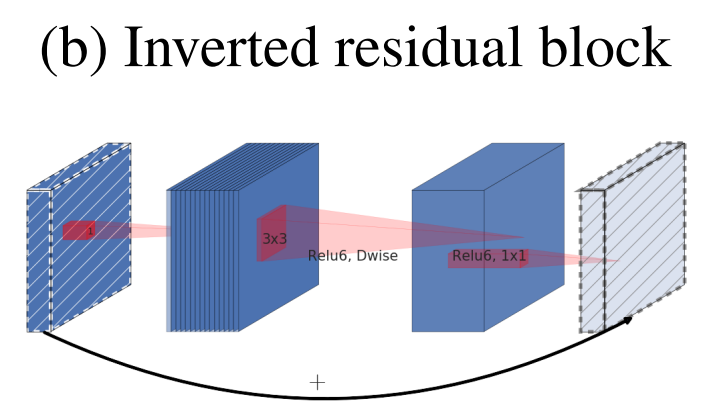

 연산량이 정말로 줄어드는지 한번 계산해보자. 
 
 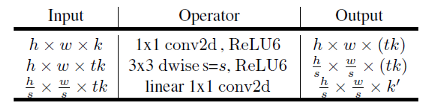
 
 Input의 크기 : h x w  -> 10 x10

Expansion factor : t  -> 6

Kernel size : c -> 3

Input channel : t x k -> 6 x 8 = 48

Output channel : t x k' -> 6 x 16 = 96

[Movilenet v2]

h x w x t x k x 1 x 1 x k + h x w x t x k x c x c x 1 + h x w x k' x 1 x 1 x t x k = h x w x k x t x (k + c^2 + k')

= 10 x 10 x 6 x 8 x (8 + 9 + 16) = 158400


위 식에서 빨간색은 각 layer의 output을 의미하고 연두색은 그 output을 계산하기 위한 convolution filter size를 의미한다.
첫번째 레이어에서는 pw 연산을 위해 1x1 convolution을 하기 때문에 input channel만 곱해진다.
두번째 레이어에서는 dw 연산을 위해 3x3 convolution을 하기 때문에 c x c가 곱해지고 대신 곱해지는 채널의 수가 1이므로 채널은 생략.
세번째 레이어는 첫번째 레이어와 동일한 방식이고 연산결과 output channel k'가 나오게 된다.
일반적인 Convolution 및 Mobilenet v1의 연산량과 비교해보면


[Simple Convolution]

h x w x t x k x c x c x t x k'

= 10 x 10 x 6 x 8 x 3 x 3 x 6 x 16 = 4147200

 

[Movilenet v1]

h x w x t x k x c x c x 1 + h x w x t x k' x 1 x 1 x t x k = h x w x k x t x (c^2 + t x k')

= 10 x 10 x 6 x 8 x (9 + 96) = 504000

 

계산된 feature_map 기준에서 보면 연산량이 일반적인 convolution보다 26배 적고 mobilenet v1보다 3배정도 더 적은것을 확인할 수 있다.

### 2.  Linear Bottlenecks
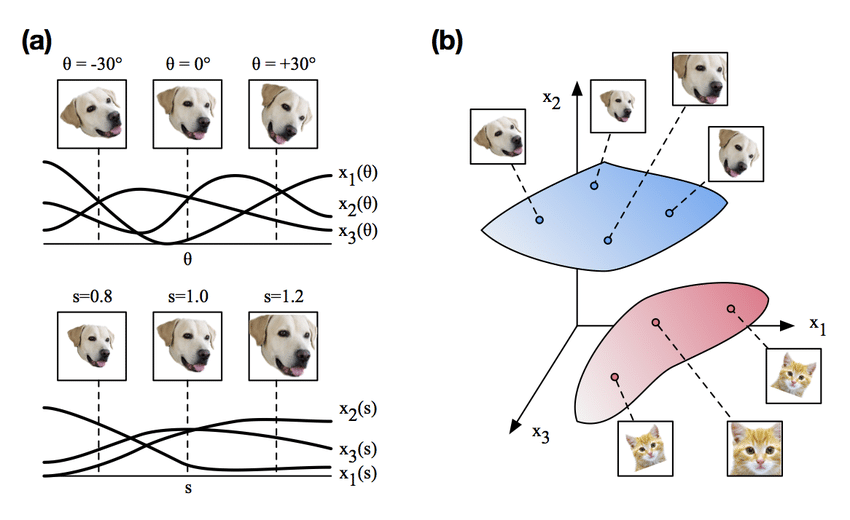
Neural network들은 일반적으로 고차원에서 저차원으로 압축하는 Encoder역할의 네트워크 부분이 발생하고 이 과정에서 feature extraction을 수행하게 된다.

위 그림처럼 고차원의 데이터가 저차원으로 압축되면서 특정 정보들이 저차원의 어떤 영역으로 매핑이 되게 되는데, 이것을 manifold라고 이해하면 좋을것 같다.

따라서 뉴럴 네트워크의 manifold는 저차원의 subspace로 매핑이 가능하다고 가정을 할 수있다.

이런 관점에서 보면 어떤 데이터에 관련된 manifold가 ReLU를 통과하고 나서도 입력값이 음수가 아니라서 0이 되지 않은 상태라면, ReLU는 linear transformation 연산을 거친 것이라고 말할 수 있다. 즉, ReLU 식을 보면 알 수 있는것 처럼, identity matrix를 곱한것과 같아서 단순한 linear transformation과 같다고 볼 수 있는 것이다.

그리고 네트워크를 거치면서 저차원으로 매핑이 되는 연산이 계속 되는데, 이 때, (인풋의 manifold가 인풋 space의 저차원 subspace에 있다는 가정 하에서) ReLU는 양수의 값은 단순히 그대로 전파하므로 즉, linear transformation이므로, manifold 상의 정보를 그대로 유지 한다고 볼 수 있다.

즉, 저차원으로 매핑하는 bottleneck architecture(projection convolution)를 만들 때, linear transformation 역할을 하는 linear bottleneck layer(Don't use ReLU)를 만들어서 차원은 줄이되 manifold 상의 중요한 정보들은 그대로 유지해보자는 것이 컨셉이다.


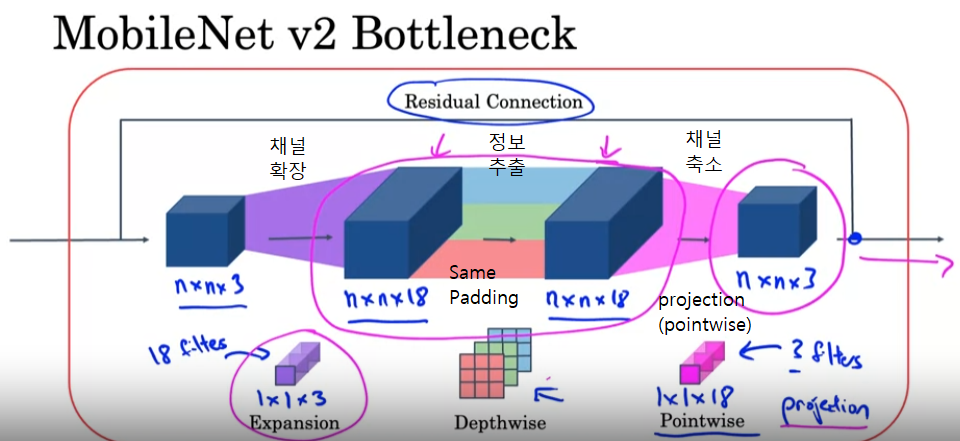

위는 실제 MobileNet의 예시이다.

채널 확장 - 정보 추출 - 채널 축소의 과정과 Skip Connection을 통해 성능을 확보하고, 계산량을 줄인다.

아래 논문을 보면 주요 계산량이 input에서와 output에서의 계산이라고 되어 있다.

채널 확장시 n * n * k의 input을 1 * 1* k의 커널로 확장시키므로 input이 narrow할수록 계산량이 적어진다.

정보 추출시에는 Depthwise로 계산하기에, 채널이 많아져 있어도 
일반 컨벌루션보다는 계산량이 적다. 

채널 축소시에는 pointwise로 계산하기에, output의 채널수가 계산량에 영향을 크게 준다.
이때 채널 축소가 일어나므로 계산량이 적다. (위 사례에서는 output 채널이 3이므로, 필요한 커널의 개수도 3개뿐이다)

https://youtu.be/VdolZqdRAOg
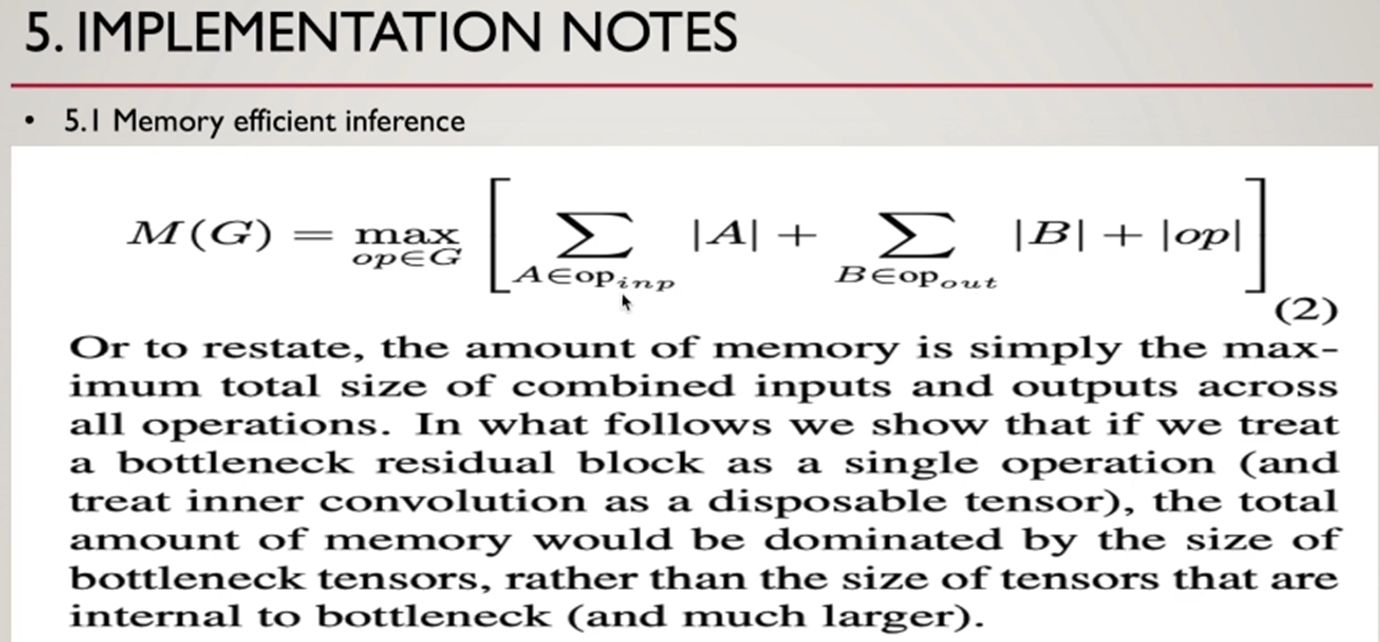

## EfficientNet

MobileNet이나 다른 모델 등을 특정 장치에 맞게 튜닝하는 방법으로, 또는 특정 목적에 맞게 정확도를 향상하거나, 좀 더 작은 신경망을 원하거면서 
속도를 개선하고자 할때 신경망을 자동으로 확장하거나 축소할수 있는 방법. (r, d, w를 조정하는 모델)

r : 이미지의 해상도
d : 신경망의 깊이
w : 레이어의 크기